In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATASETS
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE CELL.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote
from urllib.error import HTTPError
from zipfile import ZipFile

CHUNK_SIZE = 40960
DATASET_MAPPING = 'formulaaihackathon2022:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1910365%2F3185615%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20220220%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20220220T111055Z%26X-Goog-Expires%3D259199%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D347b21d8fb18dddd5d741adc58e84ebc29cdd94bcdc8597ab40ac7ff6706286d40baa4372b244d830b56f43602cfbbf26081033190482b61e48da04a8ef063c8811b8de7365fffb39f2192d2d6ab17535d2af0a706d16f856fc3355e811e32f38d9841de4d742f329c43fe1ed017d1911f30dace6c31736ac49c5390d7e0a5abe9ec7499ed40cfea8926f2e68b580c7b39c0ea99b5f876f6d6e5c50555aa031d81d5dc40665b4c23babdac1d4017a5a697ee249b7fa6b65183b1802a01aea4eb30ec695e90da53ff0212869e7a09f533d58003d58e1cdbf90f434e1a7337c245a46d93717aca6e872d628783da6cd31c9efc8bc09592396fcc3582f66341693c'
KAGGLE_INPUT_PATH='/home/kaggle/input'
KAGGLE_INPUT_SYMLINK='/kaggle'

os.makedirs(KAGGLE_INPUT_PATH, 777)
os.symlink(KAGGLE_INPUT_PATH, os.path.join('..', 'input'), target_is_directory=True)
os.makedirs(KAGGLE_INPUT_SYMLINK)
os.symlink(KAGGLE_INPUT_PATH, os.path.join(KAGGLE_INPUT_SYMLINK, 'input'), target_is_directory=True)

for dataset_mapping in DATASET_MAPPING.split(','):
    directory, download_url_encoded = dataset_mapping.split(':')
    download_url = unquote(download_url_encoded)
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as zipfileres, NamedTemporaryFile() as tfile:
            total_length = zipfileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes zipped')
            dl = 0
            data = zipfileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = zipfileres.read(CHUNK_SIZE)
            print(f'\nUnzipping {directory}')
            with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue
print('Dataset import complete.')


In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formulaaihackathon2022/weather.json
/kaggle/input/formulaaihackathon2022/weather.csv


In [35]:
import pandas as pd
df= pd.read_csv('/kaggle/input/formulaaihackathon2022/weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [36]:
df = df.loc[(df.M_SESSION_TYPE != 0) & (df.M_NUM_WEATHER_FORECAST_SAMPLES != 0),:].drop_duplicates().reset_index(drop=True)
#df['Datetime'] = pd.to_datetime(df.TIMESTAMP, unit='s') #Right Datetime Colum to use
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311839 entries, 0 to 1311838
Data columns (total 59 columns):
 #   Column                                          Non-Null Count    Dtype  
---  ------                                          --------------    -----  
 0   M_PACKET_FORMAT                                 1311839 non-null  int64  
 1   M_GAME_MAJOR_VERSION                            1311839 non-null  int64  
 2   M_GAME_MINOR_VERSION                            1311839 non-null  int64  
 3   M_PACKET_VERSION                                1311839 non-null  int64  
 4   M_PACKET_ID                                     1311839 non-null  int64  
 5   M_SESSION_UID                                   1311839 non-null  float64
 6   M_SESSION_TIME                                  1311839 non-null  float64
 7   M_FRAME_IDENTIFIER                              1311839 non-null  int64  
 8   M_PLAYER_CAR_INDEX                              1311839 non-null  int64  
 9   M_SECONDARY_P

In [37]:
def transform(df):
    '''
    ############################################ Addtional Columns #######################################################
    These columns areintroduced in order to distinguish between Forecast and Ground Truth Data
    '''
    print('Distinguishing between Forecast and Ground Truth Data...')
    df['Datetime_forecast'] = pd.to_datetime(df.TIMESTAMP, unit='s') +pd.to_timedelta(df.M_TIME_OFFSET.fillna(0), unit='minutes') #Right Datetime Colum to use
    df['TIMESTAMP_forecast'] = (df.Datetime_forecast - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    #df.TIMESTAMP.fillna(0).astype(int).astype(str) # For grouping and vieweing perspective
    df['Type_of_data'] = ((df.M_TIME_OFFSET.isna()) | (df.M_TIME_OFFSET ==0)).map({True: 'Ground Truth', False:'Forecast'}) # As per above statement
    
    
    '''
    ############################################## Columns Dropping #########################################################
    Dropping columns having only <=1 values thus conveying no information; These are hardcoded because in a smaller test data 
    There could be other columns having less unique values based upon size of data so we do not accidently want to drop them
    Still We want to keep the same function to do any kind of data transformations for both training and unseen data
    '''
    print('Dropping low-information columns...')
    
    cols_to_drop = ['Unnamed: 58',
                     'M_SAFETY_CAR_STATUS',
                     'M_SLI_PRO_NATIVE_SUPPORT',
                     'M_SECONDARY_PLAYER_CAR_INDEX',
                     'M_PACKET_FORMAT',
                     'M_PACKET_VERSION',
                     'M_PACKET_ID',
                     'M_GAME_MAJOR_VERSION']
    
    df = df.drop(columns = cols_to_drop)
    
    
    '''
    ############################################## Reshaping Data #########################################################
    Reshaping data to inline previous forecasts to combine them with original data
    '''
    print('Reshaping Data...')
    #.drop(columns=['Type_of_data', 'TIMESTAMP_forecast','Datetime_forecast'])
    dfx = df[df.Type_of_data =='Ground Truth']\
         .set_index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'TIMESTAMP'])[['M_WEATHER', 'M_RAIN_PERCENTAGE']]

    all_offsets = df[df.Type_of_data =='Forecast'].M_TIME_OFFSET.unique()


    for offset in all_offsets:
        dfx = dfx.merge(df[df.M_TIME_OFFSET==offset]\
             .drop(columns=['Type_of_data', 'TIMESTAMP','Datetime_forecast'])\
             .rename(columns = {'TIMESTAMP_forecast':'TIMESTAMP'})\
             .set_index(['M_SESSION_UID', 'M_FRAME_IDENTIFIER', 'TIMESTAMP'])\
             .rename(columns = lambda x:f'{x}_{offset}'), right_index=True, left_index=True, how='outer')
        
    '''
    ############################################## Returning Data  #########################################################
    Returning Transformed Data for model
    '''
    print('Returning Transformed Data for model...')

    return dfx

# 1. Classification Model

### Configuring Dataset for model
With only random 50% of dataset is taken as it will be able to run in limited resources. Since we have transformed data in such a way that all packet values are in a single row, no data loss occurs as well

In [41]:
from pycaret.classification import *
dfx = transform(df).sample(frac=0.5) 
clf1 = setup(data = pd.get_dummies(dfx.loc[dfx.M_WEATHER.notna()].drop(columns = 'M_RAIN_PERCENTAGE').reset_index()), target = 'M_WEATHER', silent=True)

,Description,Value
0,session_id,379
1,Target,M_WEATHER
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(38571, 380)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,376
8,Ordinal Features,False
9,High Cardinality Features,False


## Training multiple models and printing Accuracy

In [42]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,0.4100
et,Extra Trees Classifier,0.9999,1.0000,0.9999,0.9999,0.9999,0.9998,0.9998,0.3030
xgboost,Extreme Gradient Boosting,0.9998,1.0000,0.9995,0.9998,0.9998,0.9995,0.9995,38.7200
gbc,Gradient Boosting Classifier,0.9997,1.0000,0.9991,0.9997,0.9997,0.9994,0.9994,1.7150
knn,K Neighbors Classifier,0.9996,1.0000,0.9988,0.9996,0.9996,0.9991,0.9991,0.0860
dt,Decision Tree Classifier,0.9996,0.9995,0.9987,0.9996,0.9996,0.9990,0.9990,0.0150
catboost,CatBoost Classifier,0.9990,1.0000,0.9987,0.9990,0.9990,0.9979,0.9979,10.9650
lightgbm,Light Gradient Boosting Machine,0.9989,1.0000,0.9993,0.9989,0.9989,0.9976,0.9977,0.3110
ada,Ada Boost Classifier,0.8221,0.7917,0.8287,0.8494,0.8105,0.5926,0.6317,0.1910
lda,Linear Discriminant Analysis,0.7306,0.7662,0.4251,0.6926,0.6896,0.2882,0.3231,0.0140


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The outputs_2d_ attribute is deprecated in version 0.22 and will be removed in version 0.24. It is equivalent to n_outputs_ > 1.
  warnings.warn(msg, category=Futur

In [40]:
print(best) # Best model for regression
# We found it to be the best model across all comparisons. Training that model for regression

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=590, verbose=0,
                       warm_start=False)


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: overflow encountered in square
  S2 = (S ** 2) / (len(Xg) - 1)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_class

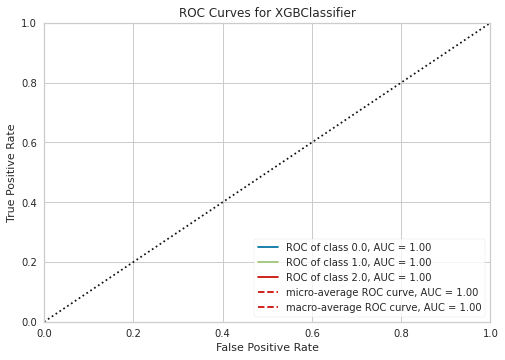

In [18]:
plot_model(best)

### Test code for Classification model

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
best = finalize_model(best)

### Code to Save model

In [21]:
save_model(best, 'best_clf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='M_WEATHER',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1,

### Code to Load model

In [24]:
best = load_model('best_clf')

Transformation Pipeline and Model Successfully Loaded


/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: overflow encountered in square
  S2 = (S ** 2) / (len(Xg) - 1)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:805: RuntimeWarning: invalid value encountered in subtract
  likelihood = np.exp(values - values.max(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/opt/conda/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: overflow encountered in square
  S2 = (S ** 2) / (len(Xg) - 1)
/opt/c

# 2. Regression Model

### Configuring Dataset for model
With only random 50% of dataset is taken as it will be able to run in limited resources. Since we have transformed data in such a way that all packet values are in a single row, no data loss occurs as well

In [25]:
from pycaret.regression import *
dfx = transform(df).sample(frac=0.5) 
reg = setup(data = pd.get_dummies(dfx.loc[dfx.M_RAIN_PERCENTAGE.notna()].drop(columns = 'M_WEATHER').reset_index()), target = 'M_RAIN_PERCENTAGE', silent=True)

,Description,Value
0,session_id,6883
1,Target,M_RAIN_PERCENTAGE
2,Original Data,"(1418, 380)"
3,Missing Values,True
4,Numeric Features,3
5,Categorical Features,376
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(992, 3)"


## Training multiple models and printing MAE score

In [26]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1359,9.5444,3.0729,0.3124,0.7838,0.6627,0.0280
lightgbm,Light Gradient Boosting Machine,2.1578,9.8068,3.1219,0.2912,0.7982,0.7066,0.1170
catboost,CatBoost Regressor,2.1693,9.7502,3.1098,0.2954,0.7959,0.7045,1.1440
rf,Random Forest Regressor,2.2355,11.3960,3.3542,0.1804,0.8304,0.7526,0.2120
knn,K Neighbors Regressor,2.2662,10.6835,3.2564,0.2299,0.8186,0.7049,0.0250
xgboost,Extreme Gradient Boosting,2.2848,11.8734,3.4236,0.1478,0.8381,0.8031,19.4660
et,Extra Trees Regressor,2.3553,13.5566,3.6519,0.0283,0.9039,0.8328,0.1840
ada,AdaBoost Regressor,2.3946,10.3706,3.2144,0.2536,0.8313,0.8195,0.0140
dt,Decision Tree Regressor,2.5369,17.2244,4.1212,-0.2331,1.0325,0.9201,0.0110
lr,Linear Regression,2.6176,14.4700,3.7774,-0.0043,0.8665,0.8771,0.4720


In [27]:
print(best) # Best model for regression

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1359,8.6655,2.9437,0.2938,0.8475,0.6813
1,1.8798,6.3776,2.5254,0.5198,0.7371,0.6726
2,1.9366,7.7734,2.7881,0.3690,0.7846,0.7043
3,2.1071,11.7690,3.4306,0.0343,0.8097,0.5138
4,2.3403,10.2757,3.2056,0.4304,0.7864,0.8317
5,2.3439,10.3994,3.2248,0.4300,0.7931,0.7946
6,2.3394,11.3260,3.3654,0.3028,0.7594,0.6298
7,2.3722,10.8618,3.2957,0.4440,0.7313,0.7331
8,2.0324,8.6747,2.9453,-0.0076,0.8063,0.7401
9,2.2052,11.3794,3.3733,0.1378,0.9036,0.7432


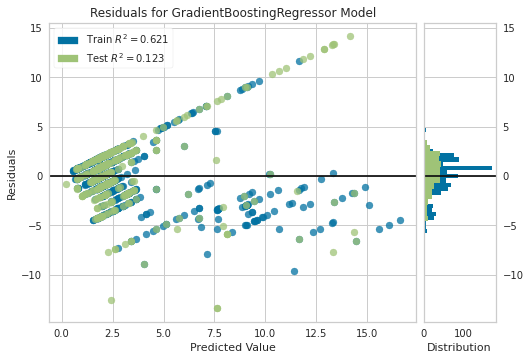

In [28]:
plot_model(best)

### Test code for regression model

In [29]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
best = finalize_model(best)

### Code to Save model

In [31]:
save_model(best, 'best_reg')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='M_RAIN_PERCENTAGE',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_de

### Code to Load model

In [33]:
best = load_model('best_reg')

Transformation Pipeline and Model Successfully Loaded


### Code for Test

In [ ]:
dfx = transform(df).sample(frac=0.0001) #Can be any data having same columns
data_unseen = pd.get_dummies(dfx.loc[dfx.M_WEATHER.notna()].drop(columns = 'M_RAIN_PERCENTAGE').reset_index())
unseen_predictions = predict_model(best, data=data_unseen)
unseen_predictions.head()